# Chapter 03 - Exercises

## 3.1

### Answers

* see below

In [1]:
# %load ../snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

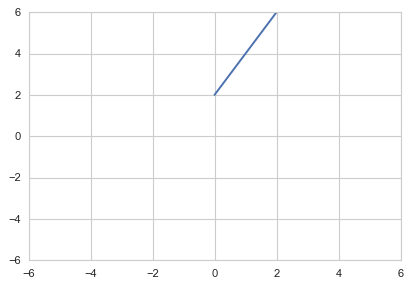

In [2]:
# (0,2) -> (2,6)
plt.plot([0,2], [2,6])
plt.xlim([-6,6])
plt.ylim([-6,6]);

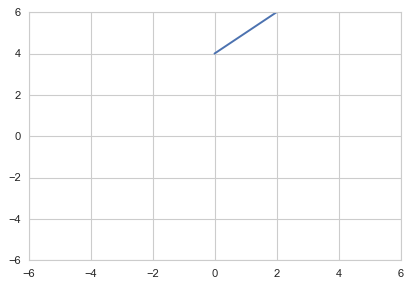

In [3]:
# (0,4) -> (2,6)
plt.plot([0,2], [4,6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

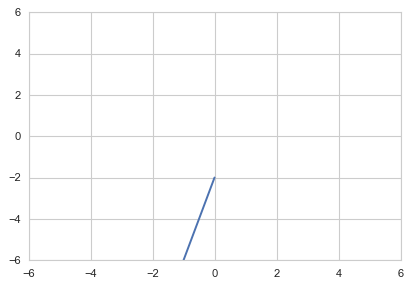

In [4]:
# (0, -2) -> (-1, -6)
plt.plot([0,-1], [-2,-6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

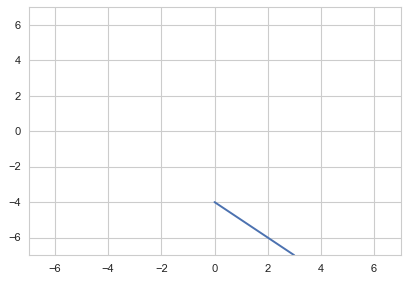

In [5]:
# (0, -4) -> (3, -7)
plt.plot([0,3], [-4,-7]);
plt.xlim([-7,7])
plt.ylim([-7,7]);

## 3.3

### Answers

* a) y = 2.000000 x + 2.000000
* b) y = 1.000000 x + 4.000000
* c) y = 4.000000 x + -2.000000
* d) y = -1.000000 x + -4.000000

In [6]:
def line_from_points(p1, p2):
    slope = (p2[1]-p1[1]) / (p2[0]-p1[0])
    intercept = p1[1] - (slope * p1[0])
    print("y = %f x + %f" % (slope, intercept))

In [7]:
line_from_points((0,2), (2,6))

y = 2.000000 x + 2.000000


In [8]:
line_from_points((0,4), (2,6))

y = 1.000000 x + 4.000000


In [9]:
line_from_points((0, -2), (-1, -6))

y = 4.000000 x + -2.000000


In [10]:
line_from_points((0, -4), (3, -7))

y = -1.000000 x + -4.000000


## 3.5

### Answers

* a) 2, 3
* b) 1, 1
* c) 3, -2
* d) 5, 0
* e) -2, 4

## 3.7

### Answers

* note: the fixed width format is a bit messed up in this file, need to clean it up manually first pre-load
* y = -1.2 x + 2.0

In [11]:
ex3_7 = pd.read_table("../data/ch03/Ex3_7.dat", names=["x", "y"], delimiter='\t')
ex3_7.head()

,x,y
0,-2,4
1,-1,3
2,0,3
3,1,1
4,2,-1


In [12]:
n = ex3_7.x.size
SSxy = ex3_7.cov()['x']['y'] * (n - 1)
SSxx = ex3_7.x.var() * (n-1)
b1 = SSxy / SSxx
b1

-1.2

In [13]:
b0 = ex3_7.y.mean() - (b1 * ex3_7.x.mean())
b0

2.0

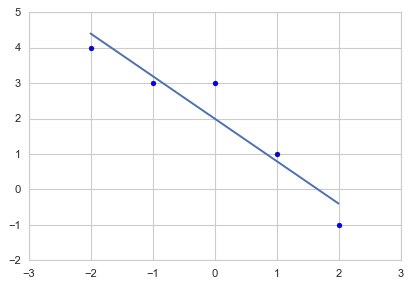

In [14]:
plt.scatter(ex3_7.x, ex3_7.y)
yHat = b1 * ex3_7.x + b0
plt.plot(ex3_7.x, yHat);

## 3.9

### Answers

* a) y = -b1 x + b0; negative
* b) yes
* c) no

## 3.11

### Answers

* d) b1 = 0.0032 - for each 1 vehicle increase, congestion time increases by 0.0032 minutes; b0 = -0.001 -- in the absence of any vehicles, congestion time would be -0.001 minutes

In [15]:
wh = pd.read_fwf("../data/ch03/warehouse.dat", names=["vehicles", "time"], colspecs="infer")

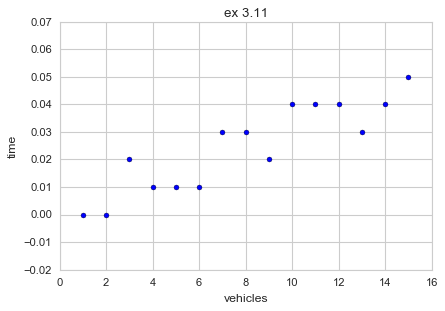

In [16]:
plt.scatter(wh.vehicles, wh.time)

plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11");

In [17]:
n = wh.vehicles.size
SSxy = wh.cov()['vehicles']['time'] * (n - 1)
SSxx = wh.vehicles.var() * (n-1)
b1 = SSxy / SSxx
b1

0.0032142857142857138

In [18]:
b0 = wh.time.mean() - (b1 * wh.vehicles.mean())
b0

-0.0010476190476190438

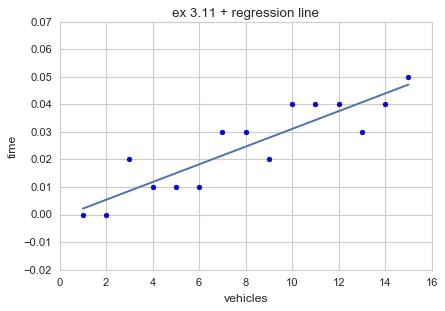

In [19]:
plt.scatter(wh.vehicles, wh.time)
yHat = b1 * wh.vehicles + b0
plt.plot(wh.vehicles, yHat)
plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11 + regression line");

## 3.13

### Answers

* a) y = -0.0023 x + 6.252
* b) b1: for each 1 ppm increase in pectin, sweetness index decreases by 0.0023; b0: in absence of pectin, sweetness index starts at 6.252
* c) 5.558880144308942

In [20]:
oj = pd.read_fwf("../data/ch03/Ojuice.dat", names=["run", "sweetness", "pectin"], colspecs="infer")
oj.head()

,run,sweetness,pectin
0,1,5.2,220
1,2,5.5,227
2,3,6.0,259
3,4,5.9,210
4,5,5.8,224


In [21]:
n = oj.run.size
SSxx = oj.pectin.var() * (n-1)
SSxy = oj.cov()['pectin']['sweetness'] * (n-1)
b1 = SSxy / SSxx
b1

-0.0023106258824640877

In [22]:
b0 = (oj.sweetness.mean() - b1 * oj.pectin.mean())
b0

6.2520679090481686

In [23]:
yHat = b1 * oj.pectin + b0

In [24]:
sweetnessIndex = b1 * 300 + b0
sweetnessIndex

5.558880144308942

## 3.15

### Answers

* estimate line : E(y) = 0.57044 + 0.02642 x
* interpret betas: for each 1 position increase, recall goes up by a factor of 0.02642; at position 0, recall is 0.570

In [25]:
ng = pd.read_fwf("../data/ch03/namegame2.dat", colspecs="infer", names=["position", "recall"])
ng.head()

,position,recall
0,2,0.04
1,2,0.37
2,2,1.00
3,2,0.99
4,2,0.79


In [26]:
n = ng.position.size
SSxx = ng.position.var() * (n-1)
SSxy = ng.cov()['position']['recall'] * (n-1)
b1 = SSxy / SSxx
b1

0.026421957671957666

In [27]:
b0 = (ng.recall.mean() - b1 * ng.position.mean())
b0

0.57044312169312106

## 3.17

* find SSE, s^2, and s

### Answers

* a) 3.7 : (1.6000000000000005, 0.5333333333333335, 0.7302967433402217)
* b) 3.11: (0.0006804761904761908, 5.234432234432237e-05, 0.007234937618550858)
* c) 3.13: (1.0171079500000006, 0.046232179545454576, 0.2150166959690679)
* d) 3.15: (9.172537398399989, 0.06459533379154922, 0.25415612090120754)

In [28]:
import math
def calculate_error_metrics(df):
    SSE = df.residual.apply(lambda x: math.pow(x, 2)).sum()
    sSquared = SSE / (len(df) - 2)
    s = math.sqrt(sSquared)
    return (SSE, sSquared, s)

In [29]:
ex3_7['predicted'] = -1.2 * ex3_7.x + 2.0
ex3_7['residual'] = ex3_7.y - ex3_7.predicted
ex3_7

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [30]:
calculate_error_metrics(ex3_7)

(1.6000000000000005, 0.5333333333333335, 0.7302967433402217)

In [31]:
wh['predicted'] = 0.0032142857142857138 * wh.vehicles -0.0010476190476190438
wh['residual'] = wh.time - wh.predicted
calculate_error_metrics(wh)

(0.0006804761904761908, 5.234432234432237e-05, 0.007234937618550858)

In [32]:
oj['predicted'] = -0.0023106258824640877 * oj.pectin + 6.2520679090481686
oj['residual'] = oj.sweetness - oj.predicted
calculate_error_metrics(oj)

(1.0169314421815812, 0.04622415646279914, 0.21499803827662972)

In [33]:
ng['predicted'] =  0.57044 + 0.02642 * ng.position
ng['residual'] = ng.recall - ng.predicted
calculate_error_metrics(ng)

(9.172537398399989, 0.06459533379154922, 0.25415612090120754)

## 3.19

### Answers

* a) scatterplot: x days, y charge : see below
* b) regression model: charge = 2884.877 * days + 223.930
* c) s = ?; interpret: 2496.667 -> we expect the observed charge value to lie within 4993.334000 of the predicted y value
* d) y^+-2s for x = 4 d => (6770.1030232804924, 11763.437023280492, 16756.771023280493)
* e) fraction of states in data with avg charge within +/- 2s of line? 91.7%

In [34]:
hospital = pd.read_fwf("../data/ch03/Hospital.dat", colspecs="infer", names=["state", "charge", "days"])
hospital.head()

,state,charge,days
0,Massachusetts,11680,3.64
1,NewJersey,11630,4.20
2,Pennsylvania,9850,3.84
3,Minnesota,9950,3.11
4,Indiana,8490,3.86


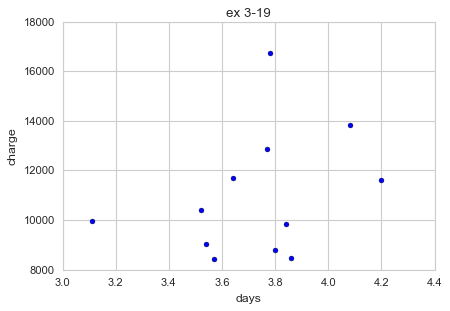

In [35]:
# %load ../snippets/plot
plt.scatter(hospital.days, hospital.charge)

plt.xlabel("days")
plt.ylabel("charge")
plt.title("ex 3-19");

In [36]:
r = np.corrcoef(hospital.days, hospital.charge)[0][1]
b1 = r * (hospital.charge.std() / hospital.days.std())
b0 = hospital.charge.mean() - b1 * hospital.days.mean()
print("b1: %f, b0: %f" % (b1, b0))

b1: 2884.876681, b0: 223.930301


In [37]:
hospital['predicted'] = b1 * hospital.days + b0
hospital['residual'] = hospital.charge - hospital.predicted

calculate_error_metrics(hospital)

(62333443.76391665, 6233344.376391665, 2496.6666530379393)

In [38]:
s = 2496.667
print("we expect the observed charge value to lie within %f of the predicted y value" % (2 * s,))

we expect the observed charge value to lie within 4993.334000 of the predicted y value


In [39]:
predicted = b0 + b1 * 4
predicted

11763.437023280492

In [40]:
predicted + 2 * s

16756.771023280493

In [41]:
predicted - 2 * s

6770.1030232804924

In [42]:
hospital

,state,charge,days,predicted,residual
0,Massachusetts,11680,3.64,10724.881418,955.118582
1,NewJersey,11630,4.20,12340.412359,-710.412359
2,Pennsylvania,9850,3.84,11301.856754,-1451.856754
3,Minnesota,9950,3.11,9195.896777,754.103223
4,Indiana,8490,3.86,11359.554288,-2869.554288
5,Michigan,9020,3.54,10436.393750,-1416.393750
6,Florida,13820,4.08,11994.227158,1825.772842
7,Georgia,8440,3.57,10522.940051,-2082.940051
8,Tennessee,8790,3.80,11186.461687,-2396.461687
9,Texas,10400,3.52,10378.696217,21.303783


In [43]:
n1 = (np.abs(hospital.residual) <= 2 * s).sum()
n1 / len(hospital)

0.91666666666666663

## 3.21

* s = sqrt(SSE / n-2)
* sBeta1 = s / sqrt(SSx)

### Answers

* a) 3.6 -- skip : even # ex.
* b) 3.7 -- t = -5.196, tRej = -3.182 => reject H0

In [44]:
ex3_7

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [45]:
n = len(ex3_7)
SSE = np.power(ex3_7.residual, 2).sum()
s = math.sqrt(SSE / (n - 2))
SSx = ex3_7.x.var() * (n - 1)
b1 = -1.2
sBeta1 = s / math.sqrt(SSx)
t = b1 / sBeta1
t

-5.19615242270663

In [46]:
# figure out our rejection region
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

3.1824463052842629

## 3.23

### Answers

* [-0.003864, -0.000757]: We can say with 95% confidence that the sweetness index will decrease between 0.0039 and 0.0008 for each 1 unit increase in pectin.

In [47]:
n = len(oj)
SSE = np.power(oj.residual, 2).sum()
s = math.sqrt(SSE / (n - 2))
SSx = oj.pectin.var() * (n - 1)
beta1 = -0.0023106258824640877
sBeta1 = s / math.sqrt(SSx)
t = beta1 / sBeta1
t

-2.5535154460648624

In [48]:
# figure out our rejection region
alpha = 0.10
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.7171443743802419

In [49]:
# generate a confidence interval for our beta^1 param
# beta1 +/- tRej * sBeta1
ciLow = beta1 - tRej * sBeta1
ciHigh = beta1 + tRej * sBeta1
print("[%f, %f]" %(ciLow, ciHigh))

[-0.003864, -0.000757]


## 3.25

### Background

* n = 39
* beta1 = 0.88
* sBeta1 = .14

### Answers

* a) reject H0 => positively related
* b) [0.643807, 1.116193] For every 1 degree increase in head movement, body plus head rotation will increase between 0.644 and 1.116 degrees.
* c) No - 1 falls within the CI, so the slope does not differ significantly from 1.

In [50]:
n = 39
beta1 = 0.88
sBeta1 = 0.14
t = beta1 / sBeta1
t

6.285714285714286

In [51]:
# figure out our rejection region
alpha = 0.05
tRej = stats.t.ppf(1 - alpha, n - 2)
tRej

1.6870936167109873

In [52]:
# generate a confidence interval for our beta^1 param
# beta1 +/- tRej * sBeta1
ciLow = beta1 - tRej * sBeta1
ciHigh = beta1 + tRej * sBeta1
print("[%f, %f]" %(ciLow, ciHigh))

[0.643807, 1.116193]


## 3.27

### Answers

* t = 2.5969345194435576 => reject H0

In [53]:
boxing = pd.read_fwf("../data/ch03/boxing2.dat", colspecs="infer", names=["lactate", "recovery"])
boxing.head()

,lactate,recovery
0,3.8,7
1,4.2,7
2,4.8,11
3,4.1,12
4,5.0,12


In [54]:
r = np.corrcoef(boxing.lactate, boxing.recovery)[0][1]
beta1 = r * (boxing.recovery.std() / boxing.lactate.std())
beta0 = boxing.recovery.mean() - beta1 * boxing.lactate.mean()
boxing['prediction'] = beta0 + beta1 * boxing.lactate
boxing['residual'] = boxing.recovery - boxing.prediction
calculate_error_metrics(boxing)

(256.4166666666667, 18.315476190476193, 4.279658419836354)

In [55]:
SSE = 256.4166666666667
sSquared = 18.315476190476193
s = 4.279658419836354

In [56]:
SSx = boxing.lactate.var() * (len(boxing) - 1)
sBeta1 = s / math.sqrt(SSx)
t = beta1 / sBeta1
t

2.5969345194435576

In [57]:
# figure out our rejection region
alpha = 0.1
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.6870936167109873

## 3.29

### Background

* E(y) = 0.57044 + 0.02642 x

### Answers

* t = 2.858203440423017 => reject H0

In [58]:
ng.head()

,position,recall,predicted,residual
0,2,0.04,0.62328,-0.58328
1,2,0.37,0.62328,-0.25328
2,2,1.00,0.62328,0.37672
3,2,0.99,0.62328,0.36672
4,2,0.79,0.62328,0.16672


In [59]:
beta1 = 0.02642
SSE = np.power(ng.residual, 2).sum()
n = len(ng)
SSx = ng.position.var() * (n - 1)
s = math.sqrt(SSE / (n - 2))
sBeta1 = s / math.sqrt(SSx)

In [60]:
t = beta1 / sBeta1
t

2.858203440423017

In [61]:
# figure out our rejection region
alpha = 0.01
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

2.6108952945291004

## 3.31

### Answers

* r = -0.94868329805051377
* r^2 = 0.9000

In [62]:
ex3_7.head()

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [63]:
num = ex3_7.cov()['x']['y']
denom = math.sqrt(ex3_7.x.var() * ex3_7.y.var())
r = num/denom
rSquared = math.pow(r, 2)
print("r: %f, rSquared: %f" % (r, rSquared))

r: -0.948683, rSquared: 0.900000


## 3.33

### Answers

* yes - it likely shows a positive association: the higher the IQ, the higher the GPA

## 3.35

### Answers

* positive: past 3-day sales vs. future 1-day sales
* negative: sort rank and sales: the lower the rank of the product on a given search results page, the higher the predicted sales for that product

## 3.37

### Answers

* a & b)
* piano - .447 : moderately strong positive association (.199809 - 20% of variability in time explained by view)
* bench - .057 : weak positive association (.3% of variability in time explained by view)
* motorbike - .619 : fairly strong positive (38.3% of variability in time explained by view)
* armchair - .294 : fairly weak positive (8.6% ...)
* teapot - .949 : very strong positive association (90% ...)

* c) at alpha = 0.05, reject H0 for piano, motorbike, and teapot, fail to reject for bench and armchair

In [64]:
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.9768109936200895

## 3.39

### Answers

* a) y = beta0 + beta1x
* b) H0: beta1 = 0, H1: beta1 > 0
* c) r = -.26; fairly weak negative correlation.  No: talpha = 1.656, t = -3.117, fail to reject H0

In [65]:
r = -0.26
n = 136
t = (r * math.sqrt(n - 2)) / (math.sqrt(1 - math.pow(r, 2)))
t

-3.1169125292737547

In [66]:
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha), n - 2)
tRej

1.6563045418965052

## 3.41

### Answers

* r = 0.570, r^2 = 0.325
* 32.5% of variability in recovery time is explained by lactate levels

In [67]:
r = boxing.corr()['lactate']['recovery']
rSq = math.pow(r, 2)
print("r: %f , r^2: %f" % (r, rSq))

r: 0.570183 , r^2: 0.325108


## 3.43

### Answers

* a) negative
* b) -0.09086

## 3.45

### Background

* n = 20
* yHat = 2.1 + 3.4x
* mean x = 2.5
* mean y = 10.6
* SSxx = 4.77
* SSyy = 59.21
* SSxy = 16.22

### Answers

* a) sse: 4.055199, s^2: 0.225289
* b) 95% CI for E(y) when x = 2.5; interpret
* c) 95% CI for E(y) when x = 2.0; interpret
* d) 95% CI for E(y) when x = 3.0; interpret
* e) what happens to CI width as x moves away from mean-x? : gets wider
* f) 95% CI for individual y when x = 3.0; interpret

In [68]:
n = 20
def yHat(x):
    return 2.1 + 3.4 * x
xBar = 2.5
yBar = 10.6
SSxx = 4.77
SSyy = 59.21
SSxy = 16.22

In [69]:
beta1 = SSxy / SSxx
SSE = SSyy - beta1 * SSxy
sSquared = SSE / (n - 2)
print("sse: %f, s^2: %f" % (SSE, sSquared))

sse: 4.055199, s^2: 0.225289


In [70]:
sBeta1 = math.sqrt(sSquared) / math.sqrt(SSxx)
sBeta1

0.21732548231248094

In [71]:
import scipy.stats as stats

In [72]:
# ci for mean y

def ci_mean(yHat, xp, xBar, SSxx, s, n, alpha):
    t = stats.t.ppf(1 - (alpha / 2), n - 2)
    modifier = t * s * math.sqrt(1 / n + math.pow(xp - xBar, 2) / SSxx)
    return ((yHat - modifier, yHat + modifier), (yHat, modifier))

In [73]:
xp = 2.5
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((10.377020580246754, 10.822979419753246), (10.6, 0.22297941975324528))

In [74]:
xp = 2.0
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((8.5808808450033229, 9.2191191549966778), (8.9, 0.31911915499667787))

In [75]:
xp = 3.0
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((11.980880845003322, 12.619119154996676),
 (12.299999999999999, 0.31911915499667787))

In [76]:
# ci for mean y

def ci_prediction(yHat, xp, xBar, SSxx, s, n, alpha):
    t = stats.t.ppf(1 - (alpha / 2), n - 2)
    modifier = t * s * math.sqrt(1 + 1 / n + math.pow(xp - xBar, 2) / SSxx)
    return ((yHat - modifier, yHat + modifier), (yHat, modifier))

In [77]:
xp = 3.0
ci_prediction(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((11.252988315368126, 13.347011684631871),
 (12.299999999999999, 1.0470116846318731))

## 3.47

### Answers

* a) 90% prediction CI for x = 10
* b) 90% mean CI for x = 10
* c) compare: as expected, the prediction interval (+/- 0.0444) is wider than the mean interval (+/- 0.347)
* d) yes in both cases, but for prediction, there's a lower limit

In [78]:
n = len(wh)
SSxx = wh.vehicles.var() * (n - 1)
SSyy = wh.time.var() * (n - 1)
SSxy = wh.cov()['time']['vehicles'] * (n - 1)
yBar = wh.time.mean()
xBar = wh.vehicles.mean()

beta1 = SSxy / SSxx
beta0 = yBar - beta1 * xBar

def yHat(x):
    return beta0 + beta1 * x

SSE = SSyy - beta1 * SSxy
sSquared = SSE / (n - 2)
print("sse: %f, s^2: %f" % (SSE, sSquared))

sse: 0.000680, s^2: 0.000052


In [79]:
xp = 10
ci_prediction(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.10)

((0.017774131608907701, 0.044416344581568491),
 (0.031095238095238096, 0.013321106486330395))

In [80]:
xp = 10
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.10)

((0.027449782335920853, 0.034740693854555339),
 (0.031095238095238096, 0.0036454557593172442))

## 3.49

### Answers

* a) predicted value is between 1.0516 and 6.6347 with confidence level of 95%
* b) the interval would be narrower
* c) no - this extrapolates outside the range of values used as training data for building the model

## 3.51

### Answers

* a) y = b0 + b1 x;  [duration (m) = b0 + b1 * frequency (days/yr)]
* b) y = 155.911944 + -1.086374 * x
* c) yes: t = -2.05, tRej = 1.83
    - ?? not clear on why the answer key indicates this fails to reject H0
* d) yPred @ x = 25 w/ 95% CI, -21.581917349936532, 279.08710195223887
    - 128.75259230115117 +/- 150.3345096510877
    - ?? answer key shows 238.76 +/- 150.32 -> not clear on how they arrived at that base prediction value

In [81]:
sports = pd.read_table("../data/ch03/Japansports.dat", names=["activity", "frequency", "duration"])
sports.head()

,activity,frequency,duration
0,Jogging,135,43
1,Cycling,68,99
2,Aerobic,44,61
3,Swimming,39,60
4,Volleyball,30,80


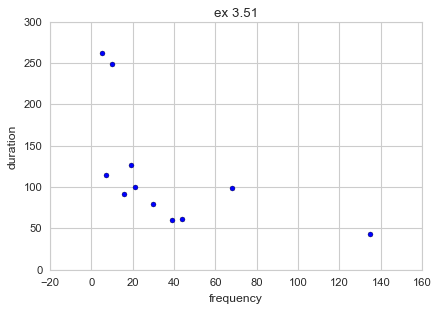

In [82]:
plt.scatter(sports.frequency, sports.duration)

plt.xlabel("frequency")
plt.ylabel("duration")
plt.title("ex 3.51");

In [83]:
n = len(sports)
SSxy = sports.cov()['frequency']['duration'] * (n - 1)
SSxx = sports.frequency.var() * (n - 1)
b1 = SSxy / SSxx
b0 = sports.duration.mean() - b1 * sports.frequency.mean()

In [84]:
print("y = %f + %f * x" % (b0, b1))

y = 155.911944 + -1.086374 * x


In [85]:
sports['prediction'] = b0 + b1 * sports.frequency
sports['residual'] = sports.duration - sports.prediction
sports

,activity,frequency,duration,prediction,residual
0,Jogging,135,43,9.251444,33.748556
1,Cycling,68,99,82.038507,16.961493
2,Aerobic,44,61,108.111485,-47.111485
3,Swimming,39,60,113.543355,-53.543355
4,Volleyball,30,80,123.320722,-43.320722
5,Tennis,21,100,133.098089,-33.098089
6,Softball,16,91,138.529959,-47.529959
7,Baseball,19,127,135.270837,-8.270837
8,Skating,7,115,148.307326,-33.307326
9,Skiing,10,249,145.048203,103.951797


In [86]:
SSE = sports.residual.apply(lambda x: math.pow(x, 2)).sum()
SSE

36164.7602200759

In [87]:
sSquared = SSE / (n - 2)
sSquared

4018.306691119544

In [88]:
s = math.sqrt(sSquared)
s

63.39011508996923

In [89]:
sBeta1 = s / math.sqrt(SSxx)
sBeta1

0.5296202460925241

In [90]:
t = b1 / sBeta1
t

-2.0512321541195022

In [91]:
tRej = stats.t.ppf(0.05, n - 2)
tRej

-1.8331129326536337

In [92]:
def yHat(x):
    return b0 + b1 * x

In [93]:
xp = 25
alpha = 0.05
yHat(xp)

128.75259230115117

In [94]:
xp = 25
ci_prediction(yHat(xp), xp, sports.frequency.mean(), SSxx, math.sqrt(sSquared), n, 0.05)

((-21.581917349936532, 279.08710195223887),
 (128.75259230115117, 150.3345096510877))

In [95]:
b0

155.91194425759289

In [96]:
b1

-1.0863740782576692

In [97]:
b0 + b1 * 25

128.75259230115117

## 3.53

### Answers

* model: y = 28.89432 + 0.90497 * x
* SSE = 13236
* s = 17.75257
* r^2 = 0.0661
* t = 1.72
* tRej = 2.018
* fail to reject H0

In [98]:
stats.t.ppf(1 - 0.05 / 2, 44 - 2)

2.018081697095881

## 3.55

### Answers

* model: y = -92.457684 + 8.346821 * x
* SSE: 3939796.906191
* s^2 = 82079.10221230522
* s = 286.49450642604864
* sBeta1 = 2.5700539268910747
* t = 3.2477219925471013
* tRej = 2.0106347546964454  => reject H0
* r = 0.42444745482707352
* r^2 = 0.18015564190918062

In [99]:
beanie = pd.read_fwf("../data/ch03/BEANIE.DAT", colspec="infer", names=["name", "age", "status", "value"])
beanie.head()

,name,age,status,value
1,Ally,52,R,55.0
2,Batty,12,C,12.0
3,Bongo,28,R,40.0
4,Blackie,52,C,10.0
5,Bucky,40,R,45.0


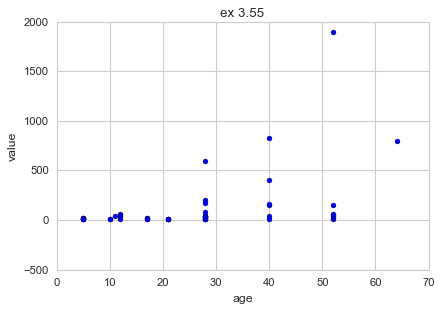

In [100]:
plt.scatter(beanie.age, beanie.value)

plt.xlabel("age")
plt.ylabel("value")
plt.title("ex 3.55");

In [101]:
n = len(beanie)
SSxy = beanie.cov()['age']['value'] * (n - 1)
SSxx = beanie.age.var() * (n - 1)
beta1 = SSxy / SSxx
beta0 = beanie.value.mean() - beta1 * beanie.age.mean()
def yHat(x): 
    return beta0 + beta1 * x
print("model: y = %f + %f * x" % (beta0, beta1))

model: y = -92.457684 + 8.346821 * x


In [102]:
beanie['predicted'] = beta0 + beta1 * beanie.age
beanie['residual'] = beanie.value - beanie.predicted
beanie.head()

,name,age,status,value,predicted,residual
1,Ally,52,R,55.0,341.576990,-286.576990
2,Batty,12,C,12.0,7.704164,4.295836
3,Bongo,28,R,40.0,141.253295,-101.253295
4,Blackie,52,C,10.0,341.576990,-331.576990
5,Bucky,40,R,45.0,241.415143,-196.415143


In [103]:
SSE = beanie.residual.apply(lambda x: math.pow(x, 2)).sum()
print("SSE: %f" % (SSE,))

SSE: 3939796.906191


In [104]:
sSquared = SSE / (n - 2)
sSquared

82079.10221230522

In [105]:
s = math.sqrt(sSquared)
s

286.49450642604864

In [106]:
sBeta1 = s / math.sqrt(SSxx)
sBeta1

2.5700539268910747

In [107]:
t = beta1 / sBeta1
t

3.2477219925471013

In [108]:
stats.t.ppf(1 - 0.05 / 2, n - 2)

2.0106347546964454

In [109]:
r = np.corrcoef(beanie.age, beanie.value)[0][1]
r

0.42444745482707352

In [110]:
rSquared = math.pow(r, 2)
rSquared

0.18015564190918062

## 3.63

### Answers

* a) see below, yes
* b) y = 3.465212 + 0.987157 * x
* c) at stress = 0, shear_strength = 3.465212, for each 1 unit increase in stress, shear strength increases by 0.987157 units

In [115]:
#!head ../data/ch03/stress.dat
stress = pd.read_fwf("../data/ch03/stress.dat", colspecs="infer", names=["shear_strength", "stress"])
stress

,shear_strength,stress
0,1.00,0.00
1,2.18,0.60
2,2.24,1.20
3,2.41,1.33
4,2.59,1.43
5,2.82,1.75
6,3.06,1.75


In [114]:
n = len(stress)
n

7

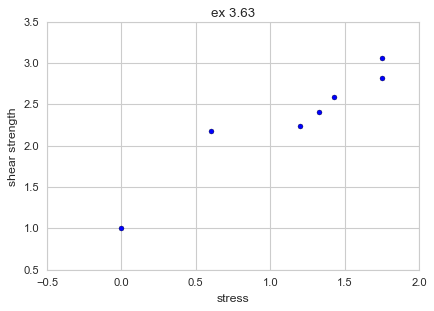

In [117]:
plt.scatter(stress.stress, stress.shear_strength)

plt.xlabel("stress")
plt.ylabel("shear strength")
plt.title("ex 3.63");

In [118]:
SSxy = stress.cov()['stress']['shear_strength'] * (n - 1)
SSxx = stress.stress.var() * (n - 1)
beta1 = SSxy / SSxx
beta1

0.98715713621571344

In [119]:
beta0 = stress.shear_strength.mean() + beta1 * stress.stress.mean()
beta0

3.465212359699807

In [120]:
print("y = %f + %f * x" % (beta0, beta1))

y = 3.465212 + 0.987157 * x


## 3.65

### Answers

* a) yes: tRej = 2.1009, t = 7.13 => reject H0
* b) yes: t = 5.98 => reject H0
* c) yes: t = 4.98 => reject H0
* d) 7.0695
* e) 35.8613
* f) 1390.0782

In [121]:
stats.t.ppf(1 - 0.05 / 2, 18)

2.1009220402409601

In [123]:
x = 8
y = .9855 + .7605 * x
y

7.0695

In [124]:
# e
x = 24.0
y = 18.1565 + .7377 * x
y

35.8613

In [125]:
# f
x = 776
y = 167.723 + 1.5752 * x
y

1390.0782

## 3.67

### Answers

* a) scatterplot: see below
* b) least squares equation: y = 78.515960 + -0.238876 * x
* c) plot least squares line on scatterplot: 
* d) test model adequacy @ alpha = 0.01: t = -2.31 => fail to reject H0
* e) identify outliers via (c)
* f) remove outliers and re-run (a) through (d)
 - y = 139.759317 + -0.449689 * x
 - t = -15.3 => reject H0

In [147]:
# a
#!head ../data/ch03/seedgerm.dat
seedgerm = pd.read_fwf("../data/ch03/seedgerm.dat", colspecs="infer", names=["free_energy", "temp"])
seedgerm.head()

,free_energy,temp
0,7.0,295.0
1,6.2,297.5
2,9.0,291.0
3,9.5,289.0
4,8.5,301.0


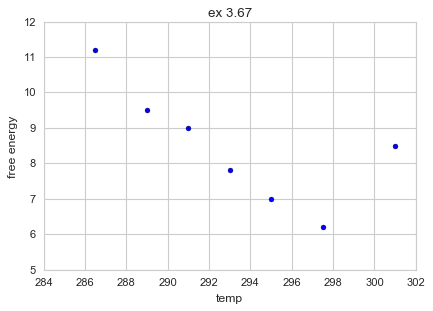

In [149]:
plt.scatter(seedgerm.temp, seedgerm.free_energy)

plt.xlabel("temp")
plt.ylabel("free energy")
plt.title("ex 3.67");

In [150]:
# b
n = len(seedgerm)
SSxy = seedgerm.cov()['temp']['free_energy'] * (n - 1)
SSxx = seedgerm.temp.var() * (n - 1)
beta1 = SSxy / SSxx
beta0 = seedgerm.free_energy.mean() - beta1 * seedgerm.temp.mean()
print("y = %f + %f * x" % (beta0, beta1))

y = 78.515960 + -0.238876 * x


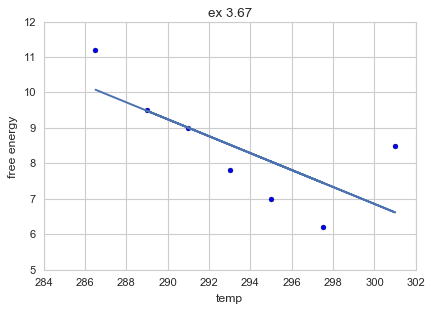

In [151]:
# c
seedgerm['prediction'] = beta0 + beta1 * seedgerm.temp
plt.scatter(seedgerm.temp, seedgerm.free_energy)
plt.plot(seedgerm.temp, seedgerm.prediction)
plt.xlabel("temp")
plt.ylabel("free energy")
plt.title("ex 3.67")
plt.show();

In [152]:
# d
seedgerm['residual'] = seedgerm.free_energy - seedgerm.prediction
SSE = seedgerm.residual.apply(lambda x: math.pow(x, 2)).sum()
SSE

8.001981896140995

In [153]:
sSquared = SSE / (n - 2)
s = math.sqrt(sSquared)
sBeta1 = s / math.sqrt(SSxx)
sBeta1

0.10331695039429825

In [154]:
t = beta1 / sBeta1
t

-2.3120664533960871

In [155]:
tRej = stats.t.ppf(0.01 / 2, n - 2)
tRej

-4.0321429835575362

In [156]:
# e
seedgerm[seedgerm.temp > 300]

,free_energy,temp,prediction,residual
4,8.5,301.0,6.614388,1.885612


In [157]:
# f
seedgerm = seedgerm[seedgerm.temp < 300]

n = len(seedgerm)
SSxy = seedgerm.cov()['temp']['free_energy'] * (n - 1)
SSxx = seedgerm.temp.var() * (n - 1)
beta1 = SSxy / SSxx
beta0 = seedgerm.free_energy.mean() - beta1 * seedgerm.temp.mean()
print("y = %f + %f * x" % (beta0, beta1))

y = 139.759317 + -0.449689 * x


In [158]:
seedgerm.prediction = beta0 + beta1 * seedgerm.temp
seedgerm.residual = seedgerm.free_energy - seedgerm.prediction
SSE = seedgerm.residual.apply(lambda x: math.pow(x, 2)).sum()
sSquared = SSE / (n - 2)
s = math.sqrt(sSquared)
sBeta1 = s / math.sqrt(SSxx)
sBeta1

0.02928984709646468

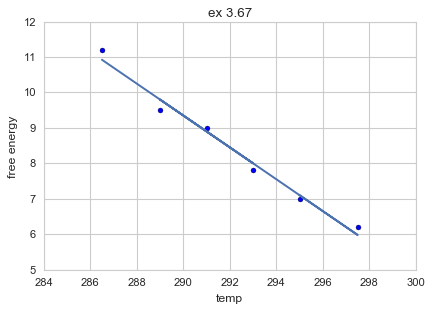

In [159]:
plt.scatter(seedgerm.temp, seedgerm.free_energy)
plt.plot(seedgerm.temp, seedgerm.prediction)
plt.xlabel("temp")
plt.ylabel("free energy")
plt.title("ex 3.67")
plt.show();

In [160]:
t = beta1 / sBeta1
t

-15.353082572017483

## 3.69

### Answers

* a) 58.7% of the variance in e/j ratio is explained by the variance in PACE
* b) r = -0.7662  => fairly strong, negative association between x & y
* c) t = -4.9155, tRej = Reject H0

In [164]:
n = 19
# beta1 < 0
rSquared = .587
r = -1 * math.sqrt(rSquared)
r

-0.7661592523751182

In [165]:
t = r * math.sqrt(n - 2) / math.sqrt(1 - r * r)
t

-4.9155088854467115

In [166]:
tRej = stats.t.ppf(1 - 0.01 / 2, n - 2)
tRej

2.8982305196347173

## 3.71

* x = incidence (% of leaves affected)
* y = log10 avg # of infections per leaf

* yHat = -.939 + .020x
* r^2 = 0.816
* s = 0.288

### Answers

* a) for each 1% increase in leaves affected, log avg # of infections increases by .020
* b) 81.6% of the variance in severity is explained by incidence
* c) the std deviation of the residuals is 0.288
* d) r = 0.9033 => strong, positive association
* e) t = 20.847 => reject H0
* f) average of 4.58 infections per leaf

In [168]:
r = math.sqrt(0.816)
r

0.9033271832508971

In [169]:
n = 100
t = r * math.sqrt(n - 2) / math.sqrt(1 - r * r)
t

20.847270700314066

In [170]:
yHat = -0.939 + 0.020 * 80
print("yHat: %f" % (yHat,))
print("antilog: %f" % (math.pow(10, yHat)))

yHat: 0.661000
antilog: 4.581419


## 3.73

### Answers

* a) yHat = beta0 + beta1 * x + eps
* b) positive: as hippocampal volume decreases, memory score does as well
* c) there is a moderately strong, positive association between the two variables
* d) the evidence indicates that the null hypothesis can be rejected

## 3.75

### Answers

* a) t = -0.98300445741948195 => fail to reject H0
* b) t = -2.2871555852230157 => reject H0
* c) The underlying analysis is flawed in that they removed a strong "counter-example" data point to make the results of the regression fit their desired outcome.  Also, rating only ranges from [1.5, 4.11] in the data, so the table is extrapolating outside the range of data used as input to the model.
* d) It biases the results in favor of showing the negative association that they're trying to establish.
* e) No

In [187]:
uffsal = pd.read_fwf("../data/ch03/UFFsal.dat", colspecs="infer", names=["raise", "rating"])
uffsal.head()                    

,raise,rating
0,18000,2.76
1,16700,1.52
2,15787,4.40
3,10608,3.10
4,10268,3.83


In [188]:
n = len(uffsal)
uffsal.describe()

,raise,rating
count,15.000000,15.000000
mean,8462.800000,3.112667
std,5149.778403,0.759788
min,2808.000000,1.520000
25%,3734.500000,2.800000
50%,8459.000000,3.100000
75%,10438.000000,3.615000
max,18000.000000,4.400000


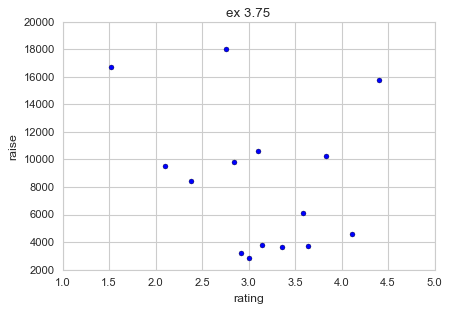

In [189]:
plt.scatter(uffsal.rating, uffsal['raise'])

plt.xlabel("rating")
plt.ylabel("raise")
plt.title("ex 3.75");

In [190]:
lr = stats.linregress(uffsal.rating, uffsal['raise'])
lr

LinregressResult(slope=-1782.8337254306748, intercept=14012.167109357213, rvalue=-0.26303578623390245, pvalue=0.34354704063763375, stderr=1813.6578242085)

In [191]:
# y = 14012.2 - 1782.8 * x
n = len(uffsal)
uffsal['prediction'] = lr.intercept + lr.slope * uffsal.rating
uffsal['residual'] = uffsal['raise'] - uffsal.prediction
SSE = uffsal.residual.apply(lambda x: math.pow(x, 2)).sum()
sSquared = SSE / (n - 2)
s = math.sqrt(sSquared)
SSxx = uffsal.rating.var() * (n - 1)
sBeta1 = s / math.sqrt(SSxx)

In [192]:
t = lr.slope / sBeta1
t

-0.98300445741948195

In [193]:
stats.t.ppf(1 - 0.05 / 2, n - 2)

2.1603686564610127

In [195]:
uffsal = uffsal.drop(2)
uffsal

,raise,rating,prediction,residual
0,18000,2.76,9091.546027,8908.453973
1,16700,1.52,11302.259847,5397.740153
3,10608,3.10,8485.382561,2122.617439
4,10268,3.83,7183.913941,3084.086059
5,9795,2.84,8948.919329,846.080671
6,9513,2.10,10268.216286,-755.216286
7,8459,2.38,9769.022843,-1310.022843
8,6099,3.59,7611.794035,-1512.794035
9,4557,4.11,6684.720498,-2127.720498
10,3751,3.14,8414.069212,-4663.069212


In [196]:
lr = stats.linregress(uffsal.rating, uffsal['raise'])
lr

LinregressResult(slope=-3886.7266369986423, intercept=19680.333534190897, rvalue=-0.55098458785307769, pvalue=0.041142627066726827, stderr=1699.3713335945426)

In [197]:
# y = 14012.2 - 1782.8 * x
n = len(uffsal)
uffsal['prediction'] = lr.intercept + lr.slope * uffsal.rating
uffsal['residual'] = uffsal['raise'] - uffsal.prediction
SSE = uffsal.residual.apply(lambda x: math.pow(x, 2)).sum()
sSquared = SSE / (n - 2)
s = math.sqrt(sSquared)
SSxx = uffsal.rating.var() * (n - 1)
sBeta1 = s / math.sqrt(SSxx)

In [199]:
t = lr.slope / sBeta1
t

-2.2871555852230157

In [200]:
uffsal.describe()

,raise,rating,prediction,residual
count,14.000000,14.000000,14.000000,1.400000e+01
mean,7939.642857,3.020714,7939.642857,2.208773e-12
std,4913.149023,0.696491,2707.069390,4.100099e+03
min,2808.000000,1.520000,3705.887056,-5.212154e+03
25%,3726.250000,2.780000,5950.471689,-2.728001e+03
50%,7279.000000,3.050000,7825.817291,-7.213167e+02
75%,10149.750000,3.532500,8875.233483,2.483861e+03
max,18000.000000,4.110000,13772.509046,9.047032e+03
